matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MATLAB®* or Mathematica®†), web application servers, and six graphical user interface toolkits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create our DF again:

In [2]:
ip_count = !cat access.log | awk '{print $1}' | sort | uniq -c | sort -rn
ip_count = [line.strip() for line in ip_count]
ip_count = [line.split() for line in ip_count][:10]
df = pd.DataFrame(ip_count, columns=['count', 'IP'])
df['count'] = df['count'].apply(int)
df.head()

,count,IP
0,206,64.134.25.220
1,138,70.114.7.38
2,115,70.125.133.107
3,109,61.219.149.7
4,93,70.114.8.49


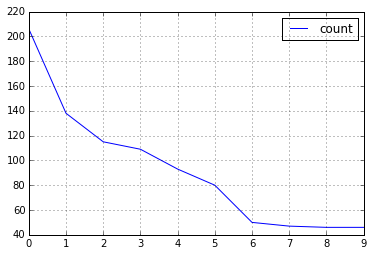

In [3]:
df.plot()

Yeah, not what we wanted at all. pandas will default to using a line graph and use it's internal index (the row numbers) to plot the data. pandas visualizations are not as full-featured as matplotlib but we can get pretty far with a few simple options.

Let's select the proper type of visualization for this data, in this case we'll use a horizontal bar chart ('barh'). We have to specify which data we expect to have plotted against the count data.

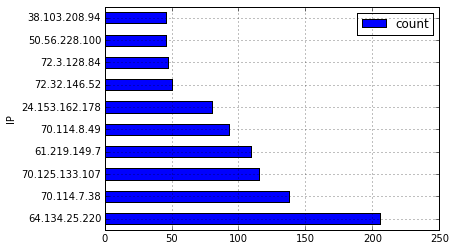

In [4]:
df.plot(kind='barh', x=df['IP'])

Ok, closer but I'd like to have the IP with the most hits at the top. We can perform transformations on the data then plot that transformed data without having to save the intermediate results.

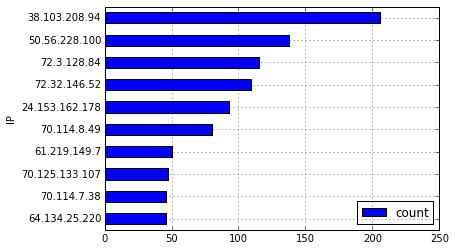

In [5]:
df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'])

From here we can start styling the graph to reduce visual noise and making it more visually appealing. 

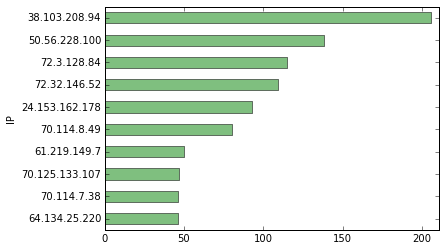

In [6]:
df.sort(columns='count', ascending=True).plot(kind='barh', 
                                              x=df['IP'],
                                              grid=False, 
                                              legend=False, 
                                              alpha=0.5, 
                                              color='g', 
                                              xlim=(0, df['count'].max() + 5))

Here are some more examples of the options we have to configure the visualization:

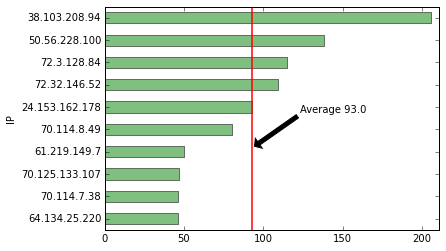

In [7]:
#primary plot as before
df.sort(columns='count', ascending=True).plot(kind='barh', 
                                              x=df['IP'],
                                              grid=False, 
                                              legend=False, 
                                              alpha=0.5, 
                                              color='g', 
                                              xlim=(0, df['count'].max() + 5))

# get plot dimensions
xmin, xmax, ymin, ymax = plt.axis()
mean = df['count'].mean()

# plot a red line for the average of the count column
plt.vlines(df['count'].mean(), ymin=ymin, ymax=ymax, linewidth=1.5, color='r')

# add an annotation (from http://matplotlib.org/users/annotations_intro.html)
plt.annotate('Average {}'.format(mean), xy=(mean, ymax / 3), 
             xytext=(mean + 30, ymax / 2), 
             arrowprops=dict(facecolor='black', shrink=0.05))

I'll mention ggplot here. There is a project from yhat (http://ggplot.yhathq.com/) to bring the ggplot API from R to python but I'm not familiar enough with the API to speak about it. matplotlib does now allow you to use different styles so we can make our plots look like they would in ggplot.

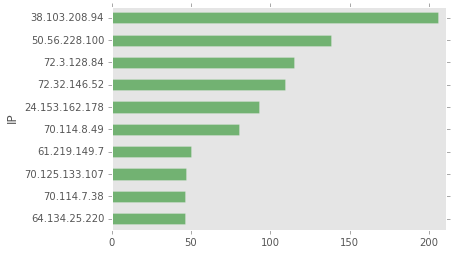

In [8]:
plt.style.use('ggplot')
df.sort(columns='count', ascending=True).plot(kind='barh', 
                                              x=df['IP'],
                                              grid=False, 
                                              legend=False, 
                                              alpha=0.5, 
                                              color='g', 
                                              xlim=(0, df['count'].max() + 5))